In [11]:
import os
import json
import nltk
import math
import numpy as np
from nltk.tokenize import TweetTokenizer

In [14]:
tknzr = TweetTokenizer(reduce_len=True)

videoLength = 28662 # temp const
numberOfMessage = 1276 # temp const

In [3]:
def normalized_shannon_entropy(text): # entropy diversity measure (normalized)
    entropy = 0
    
    textLength = len(text)
    if textLength <= 1:
        return 0
    else:
        vocabulary = set(text)
        for word in vocabulary:
            p = text.count(word) / textLength

            entropy -= p * math.log2(p)

        return entropy / math.log2(textLength)

In [6]:
messages = [[] for i in range(videoLength)]
for i in range(1, numberOfMessage + 1):
    with open("../TwitchHighlightCrawler/vod/lirik/389178879/Message-" + str(i) + ".json", "r", encoding="utf-8") as file:
        data = file.read()
    commentData = json.loads(data)['comments']
    for comment in commentData:
        offset = math.floor( comment['content_offset_seconds'] ) # get comment offset

        if offset >= videoLength:
            break

        messages[offset].append( comment['message']['body'] )
        
i = 0
clip_distribution = np.zeros(101, np.int64)
while i < videoLength:
    localMessage = ''
    for j in range(i, i+30):
        if j >= videoLength:
            break
        
        localMessage += ' '.join(messages[j]) + ' '
            
    localTokens = tknzr.tokenize(localMessage) # tokenization
    localText = nltk.text.Text(localTokens) # convert tokens to NLTK text

    score = normalized_shannon_entropy(localText)
    clip_distribution[ math.floor(score * 100) ] += 1
    
    i += 30

In [7]:
print(clip_distribution)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  1  1  1  1  0  0  2  0  2  1  1  2  0  1  5  1  1  2
  1  2  0  5  2  1  3  3  0  1  1  2  1  0  1  2  1  0  4  2 10  5 11 15
  4 11  8 17 18 25 24 26 28 28 45 49 43 53 63 68 68 65 60 62 44 18 16 10
  4  2  1  0  0]


In [15]:
import glob
import json
import matplotlib.pyplot as plt

In [16]:
DATA_PATH = "../TwitchHighlightCrawler/vod/" # const

In [81]:
def pltFrequencyDistribution(filename='', specific_video=0, only_chat=False):
    mark = np.load(filename, allow_pickle=True)[specific_video]
    
    VIDEO_PATH = DATA_PATH + mark[0] + '/'+ mark[1] +'/' # local const
    
    # read video info
    with open(VIDEO_PATH + 'info.json', "r", encoding="utf-8") as file:
        data = file.read()
    videoInfo = json.loads(data)
    
    messageCountEachWindow = np.zeros(videoInfo['length'], dtype=int)
    messagePathList = glob.glob(VIDEO_PATH + 'Message-*.json')
    for path in messagePathList:
        with open(path, "r", encoding="utf-8") as file:
            data = file.read()

        commentData = json.loads(data)['comments']
        for comment in commentData:
            offset = math.floor( comment['content_offset_seconds'] ) # get comment offset
            
            if offset >= videoInfo['length']:
                break
            if only_chat and comment['source'] != 'chat':
                continue
            
            messageCountEachWindow[ offset ] += 1
            
    maxMessageCount = messageCountEachWindow.max()
    frequencyDistribution = np.zeros(maxMessageCount + 1, dtype=int)
    for window in messageCountEachWindow:
        frequencyDistribution[ window ] += 1
    
    maxFrequencyCount = frequencyDistribution.max()
    plt.bar(range(len(frequencyDistribution)), frequencyDistribution)
    plt.xticks(range(len(frequencyDistribution)))
    for i, v in enumerate(frequencyDistribution):
        plt.text(i - 0.12 * len("%i" % v), v + 0.01*maxFrequencyCount, str(v))
    plt.show()
    
    print(messageCountEachWindow.min())

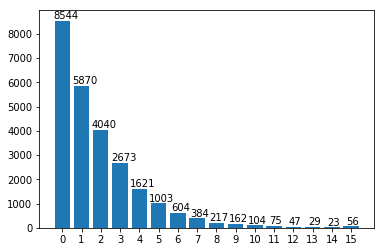

0


In [87]:
pltFrequencyDistribution('training_mark-yb9ap3dscbr3p.npy', specific_video=5, only_chat=True)

In [20]:
a  = np.zeros(5)
a

array([0., 0., 0., 0., 0.])

In [59]:
b = 55
len("%i" %b)

2